In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#uploading dataset
df = pd.read_csv("Live_20210128.csv")

In [2]:
df.shape

(7050, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [4]:
# Checking missing values
df.isnull().sum()
# Remove nan columns
df.drop(columns=["Column1", "Column2", "Column3", "Column4"], inplace=True)

In [5]:
# Checking the status_id properties
df['status_id'].unique() 

array([   1,    2,    3, ..., 7048, 7049, 7050], dtype=int64)

In [6]:
# It's clearly that each row has unique ID
len(df['status_id'].unique())

7050

In [7]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [8]:
len(df['status_published'].unique())

6913

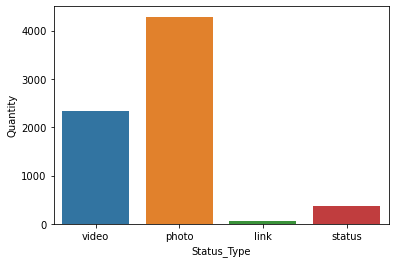

In [9]:
import seaborn as sns
sns.countplot(x='status_type', data=df)
plt.xlabel("Status_Type")
plt.ylabel("Quantity")
plt.show()

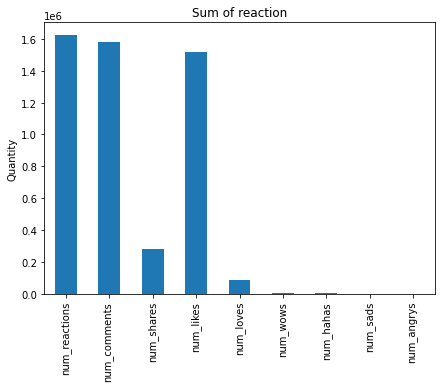

In [10]:
plt.figure(figsize=(7,5))
df.iloc[:,3:].sum().plot.bar()
plt.title('Sum of reaction')
plt.ylabel('Quantity')
plt.show()

The image displays that ‘Likes’ receives the most interactions, followed closely by ‘Reactions’ and ‘Comments’. Conversely, ‘Shares’ and other reaction types such as ‘Loves’, ‘Wows’, ‘Hahas’, ‘Sads’, and ‘Angrys’ have notably fewer interactions. This indicates that the main form of engagement with the content is through likes and general reactions, which are usually quicker and simpler for users to provide.

In [11]:
## convert status_published form String to Datetime
df['status_published'] = pd.to_datetime(df['status_published'])
df['published_year']=df['status_published'].dt.year

In [12]:
df.drop(['status_id', 'status_published'], inplace=True, axis=1)

In [13]:
df['video'] =df['status_type'].map(lambda x:1 if(x=='video') else 0)
df['photo']=df['status_type'].map(lambda x:1 if(x=='photo') else 0)
df['status']=df['status_type'].map(lambda x:1 if(x=='status') else 0)
df['link']=df['status_type'].map(lambda x:1 if(x=='link') else 0)

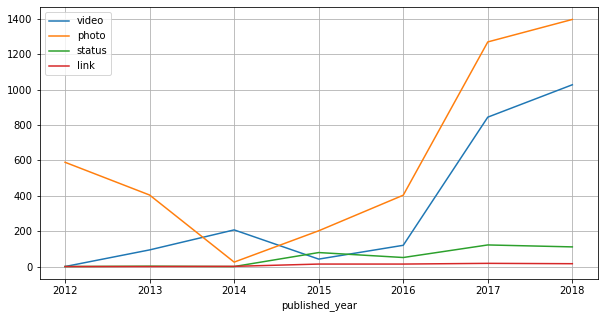

In [14]:
total_type=['video','photo','status','link']
df.groupby('published_year').sum()[total_type].plot(figsize=(10,5))  
plt.grid()
plt.show()

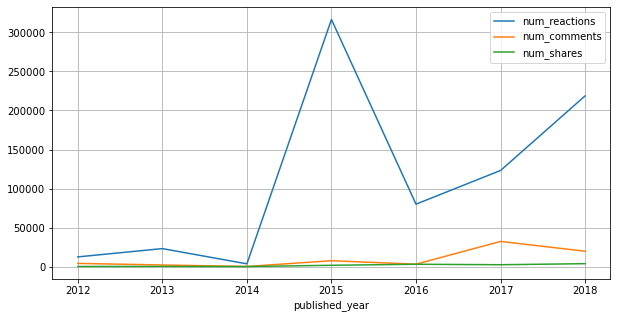

In [15]:
df[df['photo']==1].groupby('published_year').sum()[['num_reactions','num_comments','num_shares']].plot(figsize=(10,5))
plt.grid()

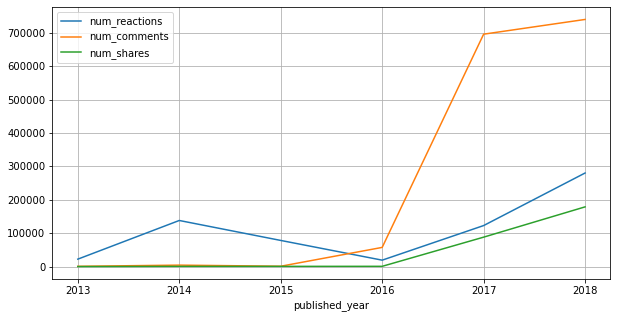

In [16]:
df[df['video']==1].groupby('published_year').sum()[['num_reactions','num_comments','num_shares']].plot(figsize=(10,5))
plt.grid()

For photo content, engagement appears to remain relatively stable or experience a slight decline from 2013 to 2015, with a notable spike in 2016 followed by another decrease in engagement from 2016 to 2018. Conversely, videos show a consistent and substantial increase in engagement across all metrics from 2012 to 2018, particularly pronounced from 2016 onwards. This surge in video engagement can be attributed to Facebook’s launch of live video functionality in August 2015. The decline in photo engagement may be attributed to shifts in user behavior towards video content, indicating a preference for more dynamic and interactive forms of media. This suggests the importance of adapting content strategies to evolving user preferences and platform features.

# Features Engineering

In [17]:
#X is feature and Y is target variable
X = df
Y = df['status_type']

In [18]:
# Transform data into LabelEncoder encoding for status_type
from sklearn.preprocessing import LabelEncoder
lab_encode = LabelEncoder()
X['status_type'] = lab_encode.fit_transform(X['status_type'])
Y = lab_encode.transform(Y)

In [19]:
X.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,published_year,video,photo,status,link
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,2016.382128,0.331064,0.608227,0.051773,0.008936
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,1.943176,0.470629,0.488181,0.221584,0.094115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Using MinMaxScaler will get the smaller loss function than StandardScaler
# Normalize feature. 
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X_scaled = ms.fit_transform(X)

# Elbow method

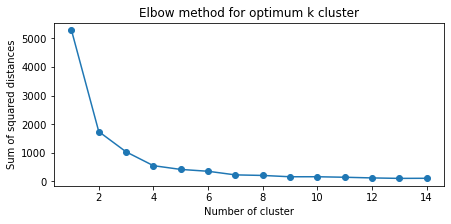

In [21]:
#Elbow method on Kmeans
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

sum_of_squared_distances = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    
plt.figure(figsize=(7,3))
plt.plot(range(1,15), sum_of_squared_distances, marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distances")
plt.title("Elbow method for optimum k cluster")
plt.show()

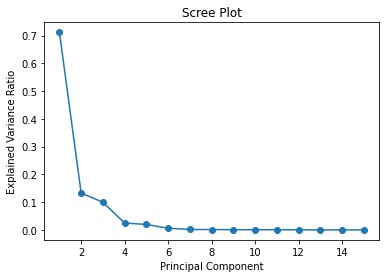

In [22]:
#Elbow method on PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# K-means, DBSCAN, Hierarchical, Spectral Clustering

In [23]:
n_cluster = 2
kmean = KMeans(n_clusters=n_cluster)
kmean.fit(X_scaled)

dbscan = DBSCAN(eps=2.1,min_samples=5) 
dbscan.fit(X_scaled)

hierarchical = AgglomerativeClustering(n_clusters=n_cluster)
hierarchical.fit(X_scaled)

spectral = SpectralClustering(n_clusters=n_cluster,affinity='nearest_neighbors')
spectral.fit(X_scaled)

C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [24]:
from itertools import permutations

# As label values are not necessarily in the same order as the original, we have to check all permutations 
def all_permutations(y):
    n_c = len(set(y))
    unique_labels = np.unique(y)
    label_perms = list(permutations(unique_labels))

    permuted_arrays = []
    
    for perm in label_perms:
        # Discrete bijection :
        label_map = dict(zip(unique_labels, perm))
        
        # Apply permutation
        permuted_y = np.array([label_map[label] for label in y])
        
        permuted_arrays.append(permuted_y) 
    return permuted_arrays


def loss_fun(y,y_pred):
    n = y.size
    permuted_arrays = all_permutations(y)
    scores=np.zeros(len(permuted_arrays))
    for i in range(len(permuted_arrays)):
        scores[i] = sum(permuted_arrays[i] != y_pred)/n
    return np.amin(scores)

print('Loss Function value of KMeans:', loss_fun(Y,kmean.labels_))
print('Loss Function value of Hieratchical:',loss_fun(Y,hierarchical.labels_))
print('Loss Function value of Spectral clustering:',loss_fun(Y,spectral.labels_))


# For DBSCAN we can consider the error with or without outliers :

print('Error taking into account outliers')
print('Classification error DBSCAN : ',loss_fun(Y,dbscan.labels_))
print('Error ignoring outliers')
print('Classification error DBSCAN : ',loss_fun(Y[dbscan.labels_ != -1],dbscan.labels_[dbscan.labels_ != -1]))

Loss Function value of KMeans: 0.06070921985815603
Loss Function value of Hieratchical: 0.06070921985815603
Loss Function value of Spectral clustering: 0.38453900709219857
Error taking into account outliers
Classification error DBSCAN :  0.39177304964539006
Error ignoring outliers
Classification error DBSCAN :  0.39177304964539006


In [25]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

kmean_pca = KMeans(n_clusters=n_cluster)
kmean_pca.fit(X_pca[:,:2])

dbscan_pca = DBSCAN(eps=2.1,min_samples=10) 
dbscan_pca.fit(X_pca[:,:2])

hierarchical_pca = AgglomerativeClustering(n_clusters=n_cluster)
hierarchical_pca.fit(X_pca[:,:2])

spectral_pca = SpectralClustering(n_clusters=n_cluster,affinity='nearest_neighbors')
spectral_pca.fit(X_pca[:,:2])

print('Loss Function value of KMeans:', loss_fun(Y,kmean_pca.labels_))
print('Loss Function value of Hieratchical:', loss_fun(Y,hierarchical_pca.labels_))
print('Loss Function value of Spectral Clustering:', loss_fun(Y,spectral_pca.labels_))


# For DBSCAN we can consider the error with or without outliers :

print('Error taking into account outliers')
print('Classification error DBSCAN : ',loss_fun(Y,dbscan_pca.labels_))
print('Error ignoring outliers')
print('Classification error DBSCAN : ',loss_fun(Y[dbscan_pca.labels_ != -1],dbscan_pca.labels_[dbscan_pca.labels_ != -1]))

C:\Users\Cs-Store\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Loss Function value of KMeans: 0.06070921985815603
Loss Function value of Hieratchical: 0.06070921985815603
Loss Function value of Spectral Clustering: 0.3824113475177305
Error taking into account outliers
Classification error DBSCAN :  0.39177304964539006
Error ignoring outliers
Classification error DBSCAN :  0.39177304964539006


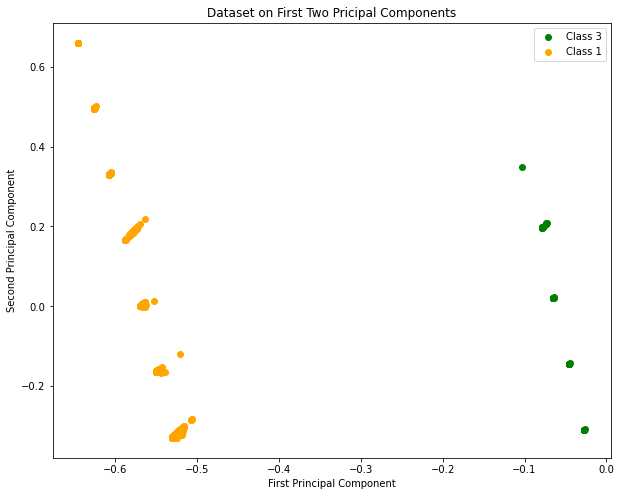

In [26]:
plt.figure(figsize=(10,8))
colors= ['green', 'orange']
for i, c in zip(range(2), colors):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y ==i, 1], c=c, label='Class ' + str(Y[i]))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.title('Dataset on First Two Pricipal Components')
plt.show()

In [27]:
def plot_clusters(X,labels, title,ind0 = 0, ind1 = 1,n_c=2):
    plt.figure(figsize=(5, 5))
    if -1 in set(labels):
        plt.scatter(X[labels == -1, ind0], X[labels == -1, ind1], c=labels[labels==-1], label='Outliers ')
    colors = ['r', 'g']
    for i, c in zip(range(n_c), colors):
        plt.scatter(X[labels == i, ind0], X[labels == i, ind1], c=c, label='Class '+str(i))
    #plt.scatter(X[:, ind0], X[:, ind1], c=labels, cmap='viridis')
    plt.title(title)
    #plt.xlabel('Feature 1')
    #plt.ylabel('Feature 2')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    #plt.colorbar()
    plt.show()
    

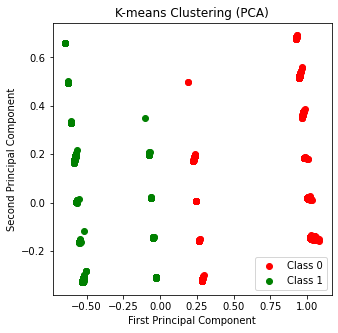

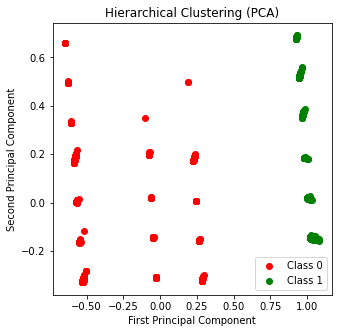

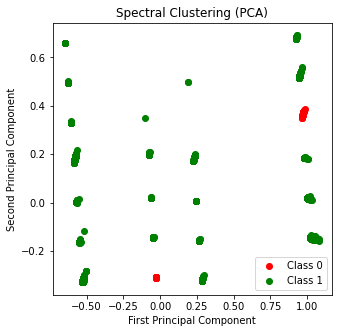

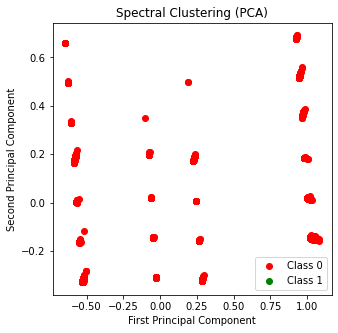

In [28]:
plot_clusters(X_pca, kmean_pca.labels_, 'K-means Clustering (PCA)')
plot_clusters(X_pca, hierarchical_pca.labels_, 'Hierarchical Clustering (PCA)')
plot_clusters(X_pca, spectral_pca.labels_, 'Spectral Clustering (PCA)')
plot_clusters(X_pca, dbscan_pca.labels_, 'Spectral Clustering (PCA)')